# EDA, Feature Engineering and Linear Regression Models 
## (Boston house prices dataset)


GitHub : https://github.com/raviteja-padala/Machine-Learning-Algorithms

Dataset: "http://lib.stat.cmu.edu/datasets/boston"

*About the Data set*: This Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass. The Data set comprises of Housing prices and other inflential variables impacting the Hosing prices. 


**Problem Statement**
To build a model to predict housing prices depending on all the influential parameters.



1. Exploratory Data Analysis and Feature Engineering

* Data Profiling
* Stastical analysis
* Graphical Analysis
* Data Encoding
* Data Scaling

2. Regression Models

* Linear Regression
* Ridge Regression
* Lasso Regression
* Elastic-Net Regression
* Performance metrics for above models




In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading dataset
from sklearn.datasets import load_boston

In [3]:
boston= load_boston()

In [4]:
#reading keys in dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
#reading INFORMATION IN DATA
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [6]:
#reading INFORMATION IN TARGET
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [7]:
#reading INFORMATION IN FEATURE_NAMES
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
# Storing data as Dataset in the form of dataframe
dataset = pd.DataFrame(boston.data, columns= boston.feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
dt = dataset.describe()
dt.T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [13]:
#creating Price column based on target

dataset['Price']=boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
#checking missing values

dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [15]:
#calculating total missing values

dataset.isnull().sum().sum()

0

In [16]:
#column in dataset
for col in dataset.columns:
    columns = dataset.columns
columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [17]:
#finding the correlation between the variables in the dataset
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

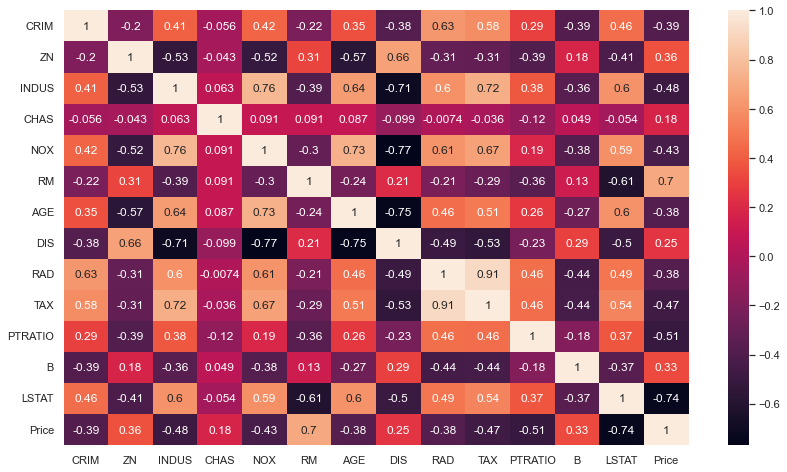

In [18]:
#finding the correlation between the variables in the dataset in the form of a heatmap
sns.set(rc={'figure.figsize':(14,8)})

sns.heatmap(dataset.corr(), annot = True)


Correlation coefficients between 0.9 and 1.0, very highly correlated.

Correlation coefficients between 0.7 and 0.9, highly correlated.

Correlation coefficients between 0.5 and 0.7, moderately correlated.

Correlation coefficients between 0.3 and 0.5, low correlation.

Correlation coefficients less than 0.3, little correlation

Note (For both positive and negative side)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

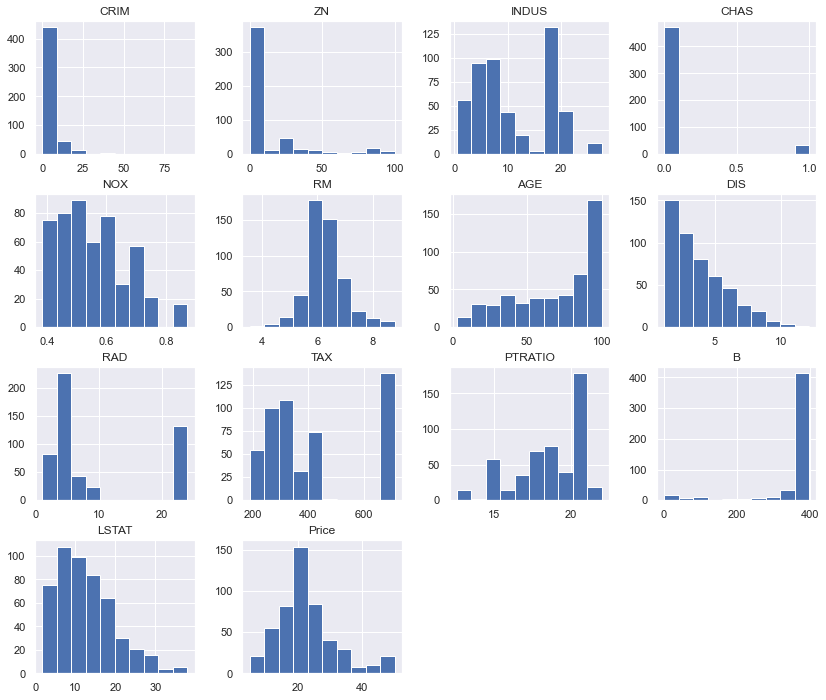

In [19]:
#Distribution of data in variables
dataset.hist(figsize=(14, 12))

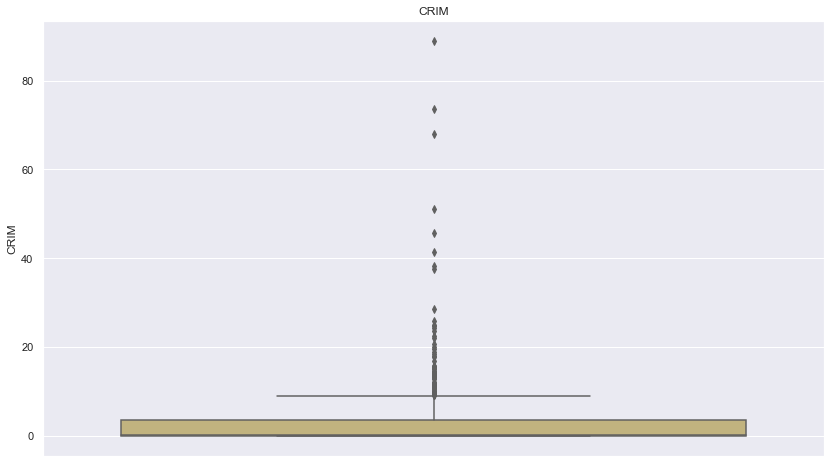

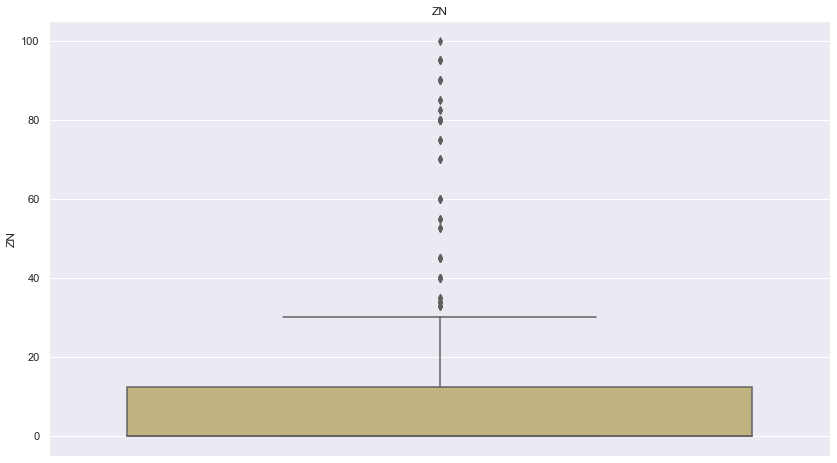

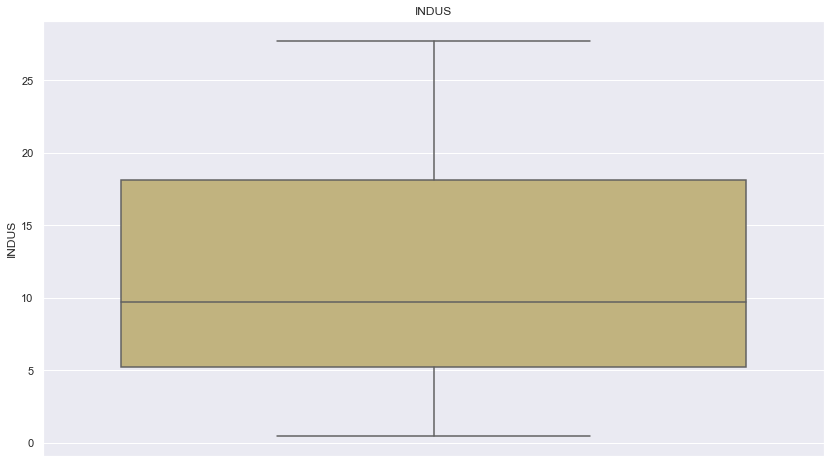

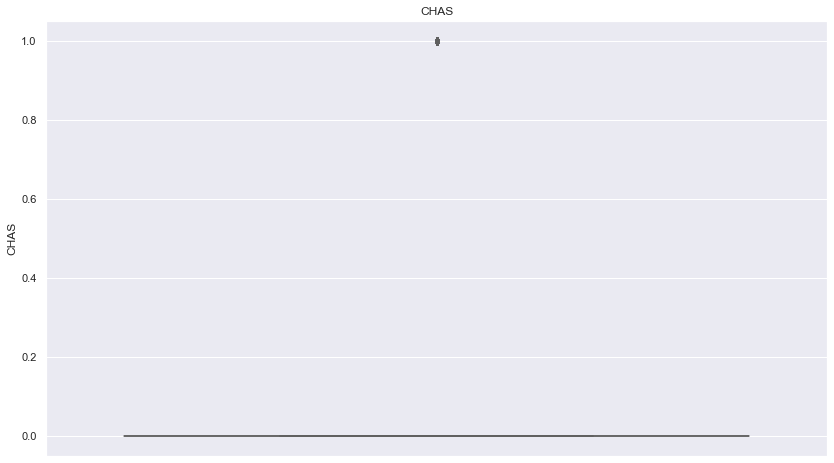

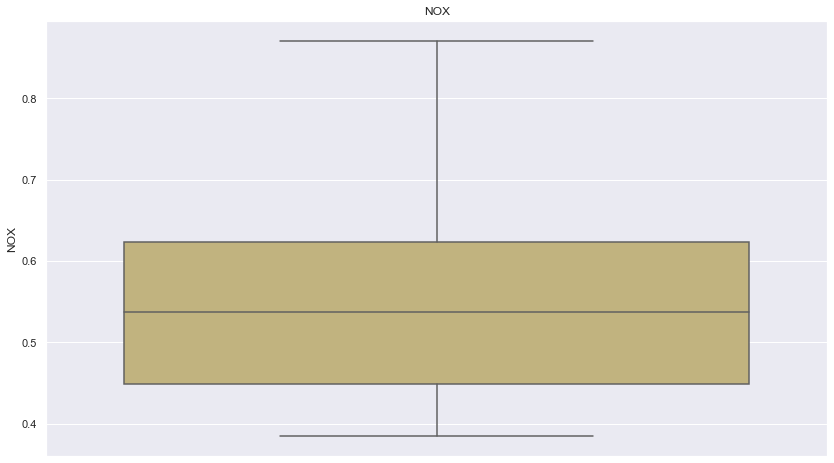

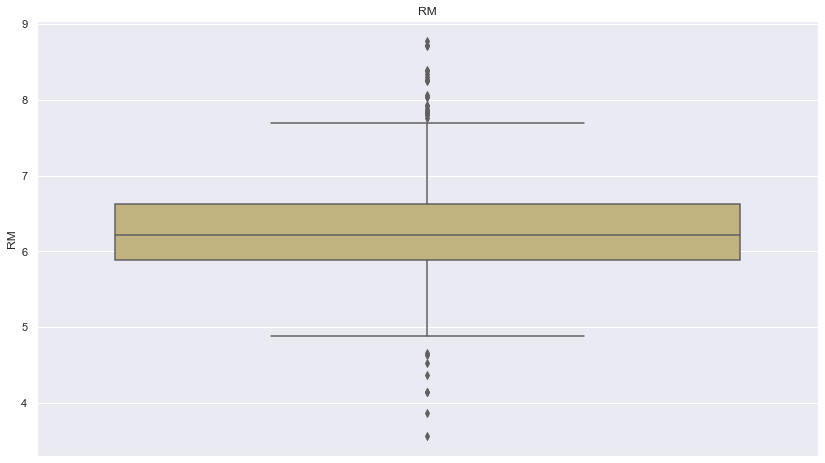

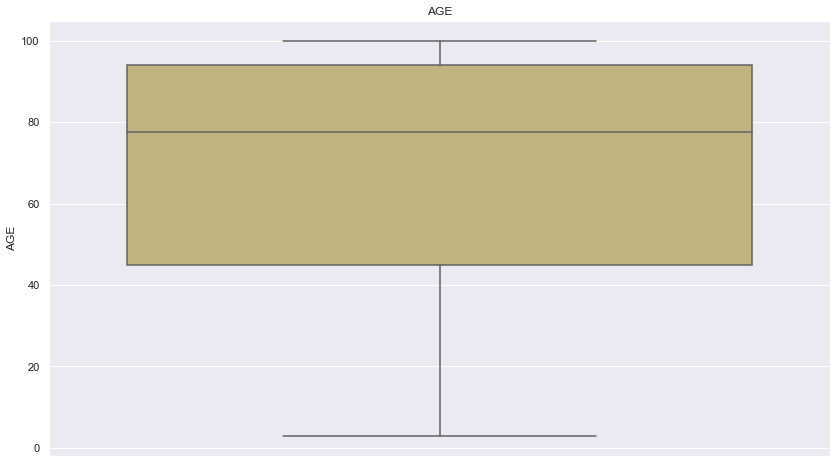

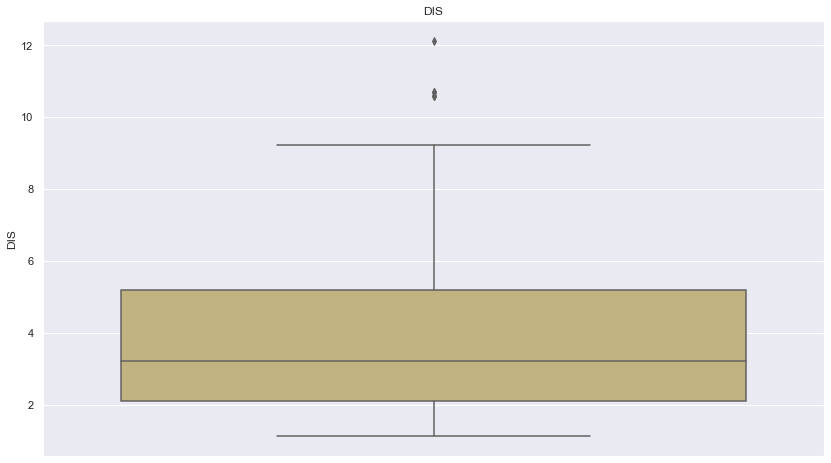

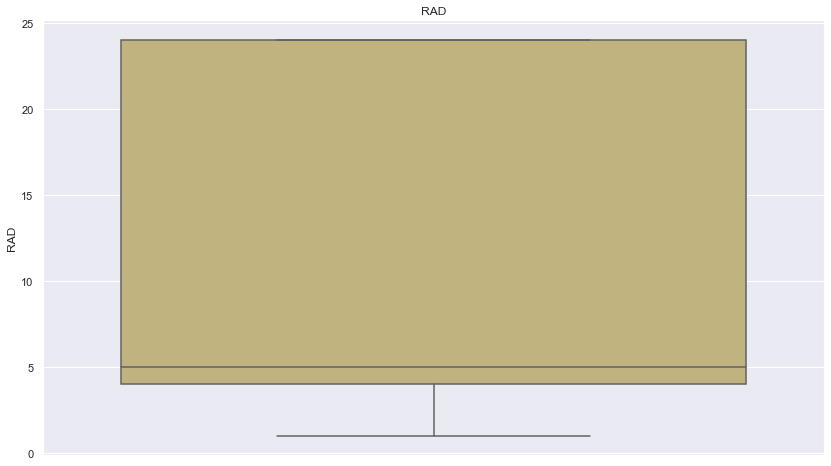

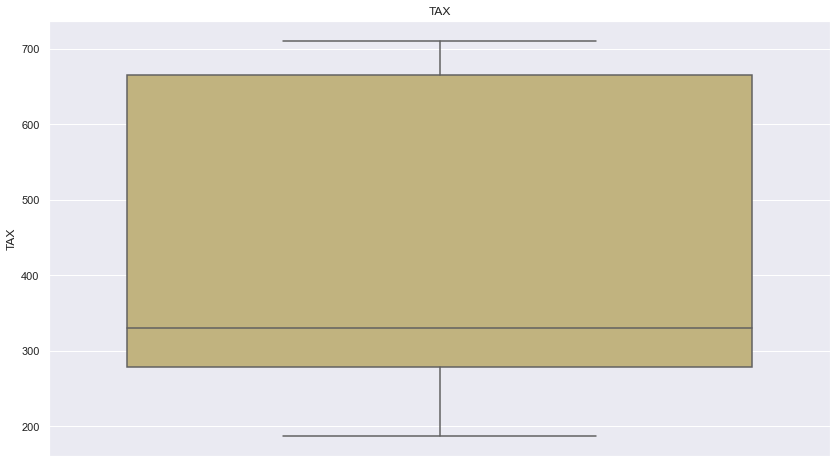

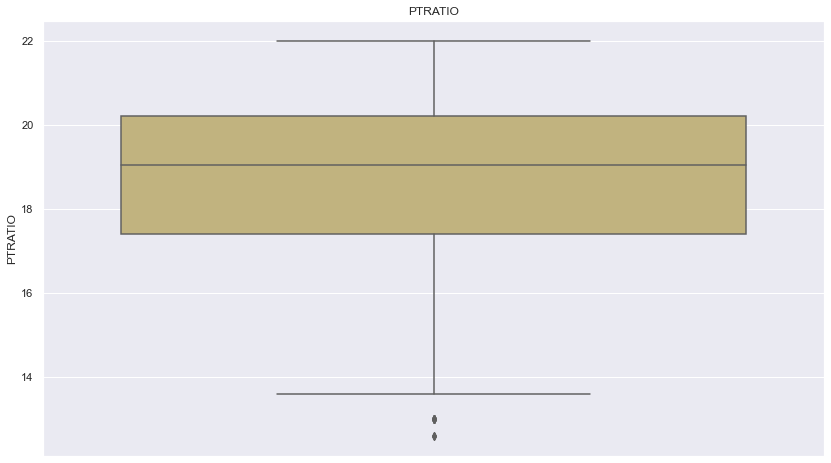

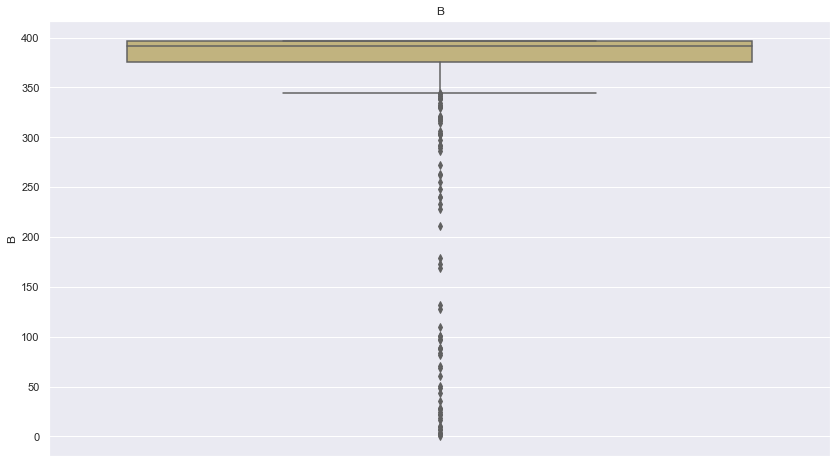

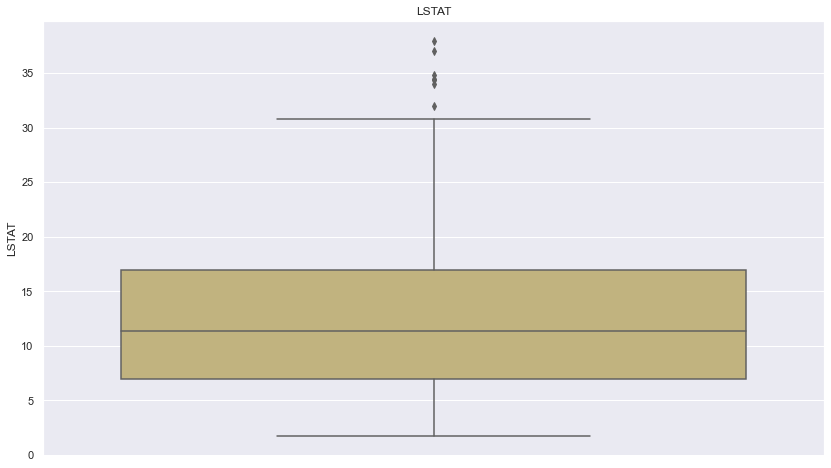

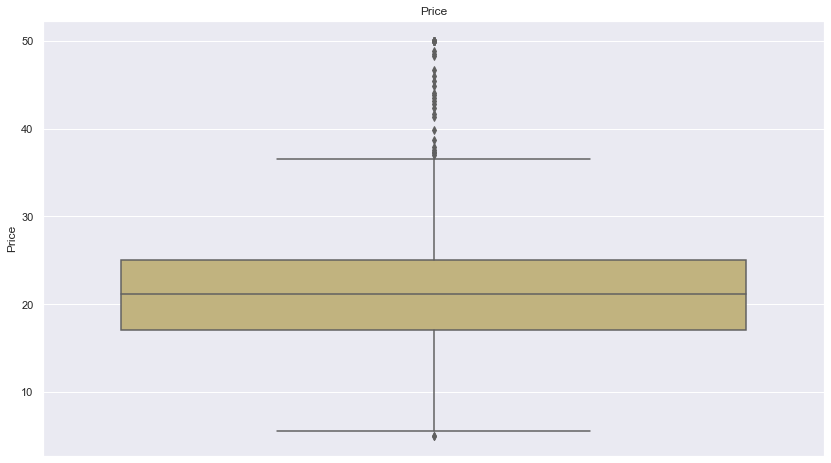

In [20]:
#Finding outliers in data

for feature in [feature for feature in dataset.columns]:
    sns.boxplot(data=dataset, y= feature, color='y')
    plt.title(feature)
    plt.show();


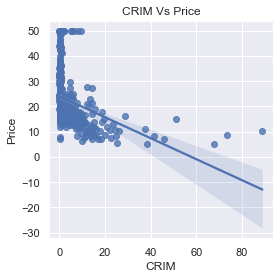

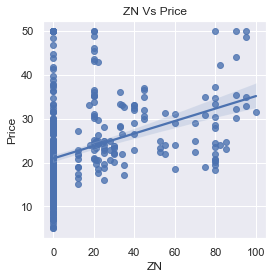

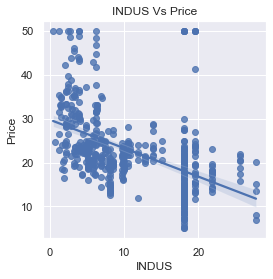

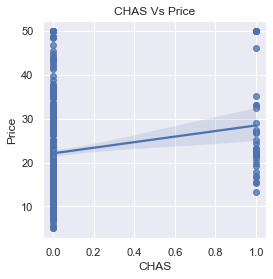

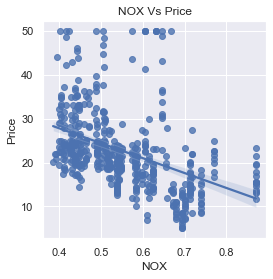

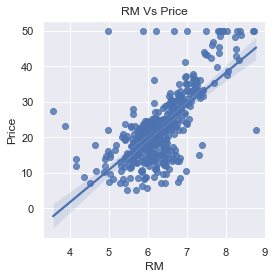

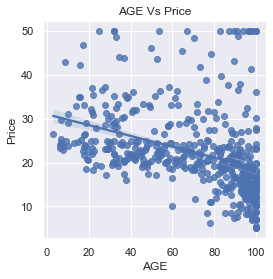

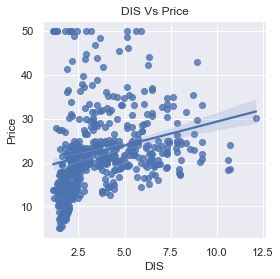

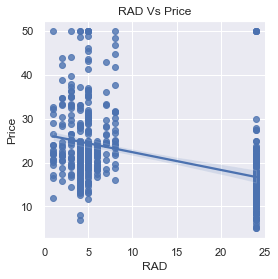

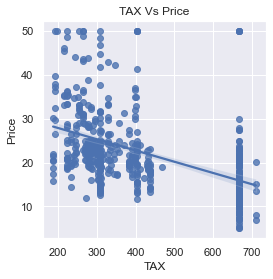

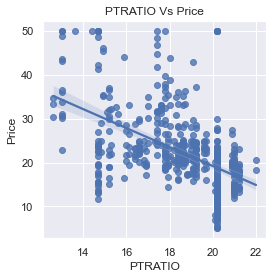

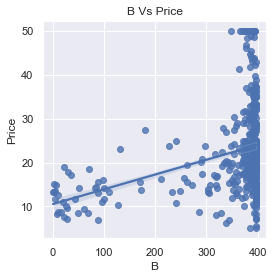

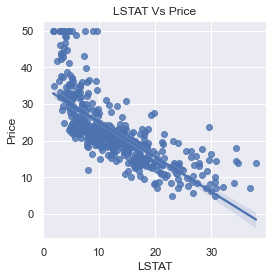

In [21]:
for feature in [feature for feature in dataset.columns if feature not in ['Price']]:
    sns.set(rc={'figure.figsize':(4,4)})
    sns.regplot(x=dataset[feature], y=dataset['Price'])
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title("{} Vs Price".format(feature))
    plt.show();
   

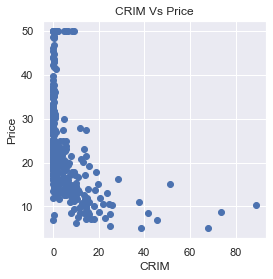

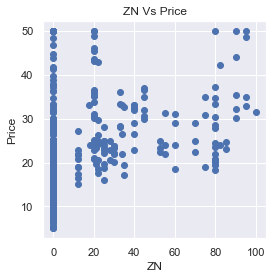

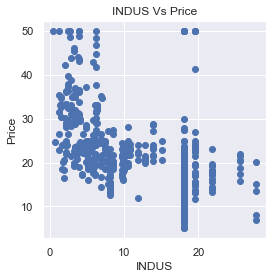

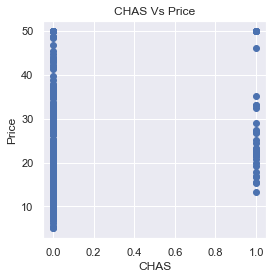

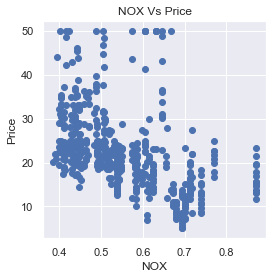

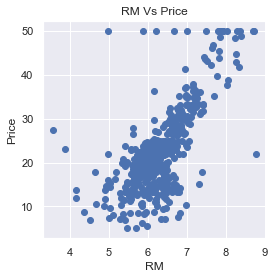

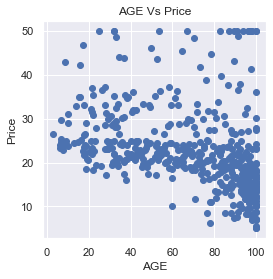

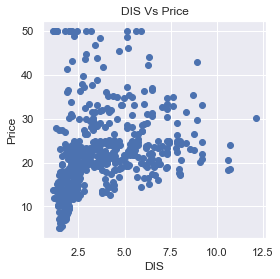

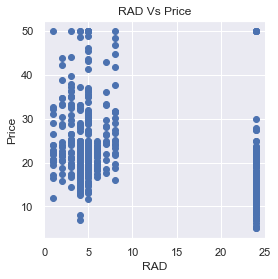

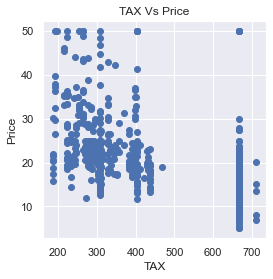

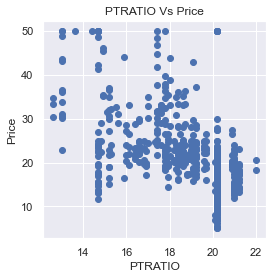

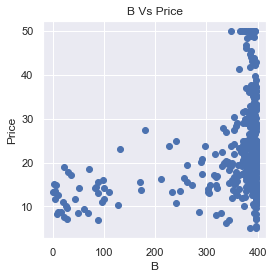

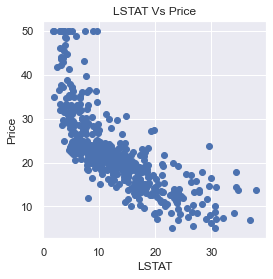

In [22]:
for feature in [feature for feature in dataset.columns if feature not in ['Price']]:
    sns.set(rc={'figure.figsize':(4,4)})
    plt.scatter(x=dataset[feature], y=dataset['Price'])
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title("{} Vs Price".format(feature))
    plt.show();

### dEPENDENT AND iNDEPENDENT fEATURES

* Independent variables are the input for a process that is being analyzes. Dependent variables are the output of the process. These variable does not depend on other variables.
* Dependent variables are mostly the output of the process. And these are dependent on other variables.


In [23]:
#Price is dependent feature stored in y, remaining are independent features stored in x

## Independent And Dependent Features
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [24]:
# Independent variables
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
# Dependent variable
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

 ### Splitting data into Training and Test data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=10)

In [28]:
print(x_train.shape)
print(y_train.shape)

(339, 13)
(339,)


In [29]:
print(x_test.shape)
print(y_test.shape)

(167, 13)
(167,)


## Standardize or feature scaling the datasets

Standardization entails scaling data to fit a standard normal distribution. A standard normal distribution is defined as a distribution with a mean of 0 and a standard deviation of 1. 

In [30]:


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [31]:
### Using fit_transform to standardise Train data
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.13641471, -0.47928013,  1.16787606, ..., -1.77731527,
         0.39261401,  2.36597873],
       [-0.41777807, -0.47928013, -1.18043314, ..., -0.75987458,
         0.14721899, -0.54115799],
       [ 1.31269177, -0.47928013,  0.95517731, ...,  0.76628645,
         0.19334986,  2.52100705],
       ...,
       [-0.13520965, -0.47928013,  0.95517731, ...,  0.76628645,
         0.17012536,  0.06331026],
       [-0.40281114, -0.47928013,  2.04022838, ...,  0.25756611,
         0.32166792,  0.27238516],
       [-0.33104058,  0.34161649, -1.07552092, ..., -2.56351944,
         0.39993132, -0.34772815]])

In [32]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)
x_test=scaler.transform(x_test)
x_test

array([[-0.41664568,  0.87519929, -1.33277144, ..., -0.06616502,
         0.41011193, -0.56391444],
       [-0.42063267,  1.98340973, -1.22498491, ..., -1.36108953,
         0.41021798, -1.11860295],
       [-0.41894074,  2.80430634, -1.16175014, ..., -1.12985301,
         0.44765291, -1.16980497],
       ...,
       [-0.40804678,  1.36773726, -1.15169007, ..., -1.54607875,
         0.29854946, -1.18545003],
       [-0.41098494, -0.47928013,  0.19779729, ...,  0.07257689,
         0.20119741, -0.13154186],
       [-0.37856708, -0.47928013, -0.22328875, ..., -0.06616502,
         0.43482111, -0.5141347 ]])

## Model Building
### 1. Linear Regression

Linear regression, also known as ordinary least squares (OLS) and linear least squares. We Use linear regression to understand the mean change in a dependent variable given a one-unit change in each independent variable. 

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression=LinearRegression()
regression

LinearRegression()

In [35]:
#training the Train-data
regression.fit(x_train,y_train)

LinearRegression()

In [36]:
## print the coefficients 

print(regression.coef_)

[-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]


In [37]:
# Putting together the coefficient and their corresponding variable names
reg_coefficient = pd.DataFrame()
reg_coefficient["Columns"] = x.columns

reg_coefficient['Coefficient Estimate'] = pd.Series(regression.coef_)
print(reg_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -1.290992
1        ZN              1.609500
2     INDUS             -0.140316
3      CHAS              0.372019
4       NOX             -1.762053
5        RM              2.227522
6       AGE              0.322689
7       DIS             -3.311842
8       RAD              2.702881
9       TAX             -2.090057
10  PTRATIO             -1.760980
11        B              1.251915
12    LSTAT             -3.833920


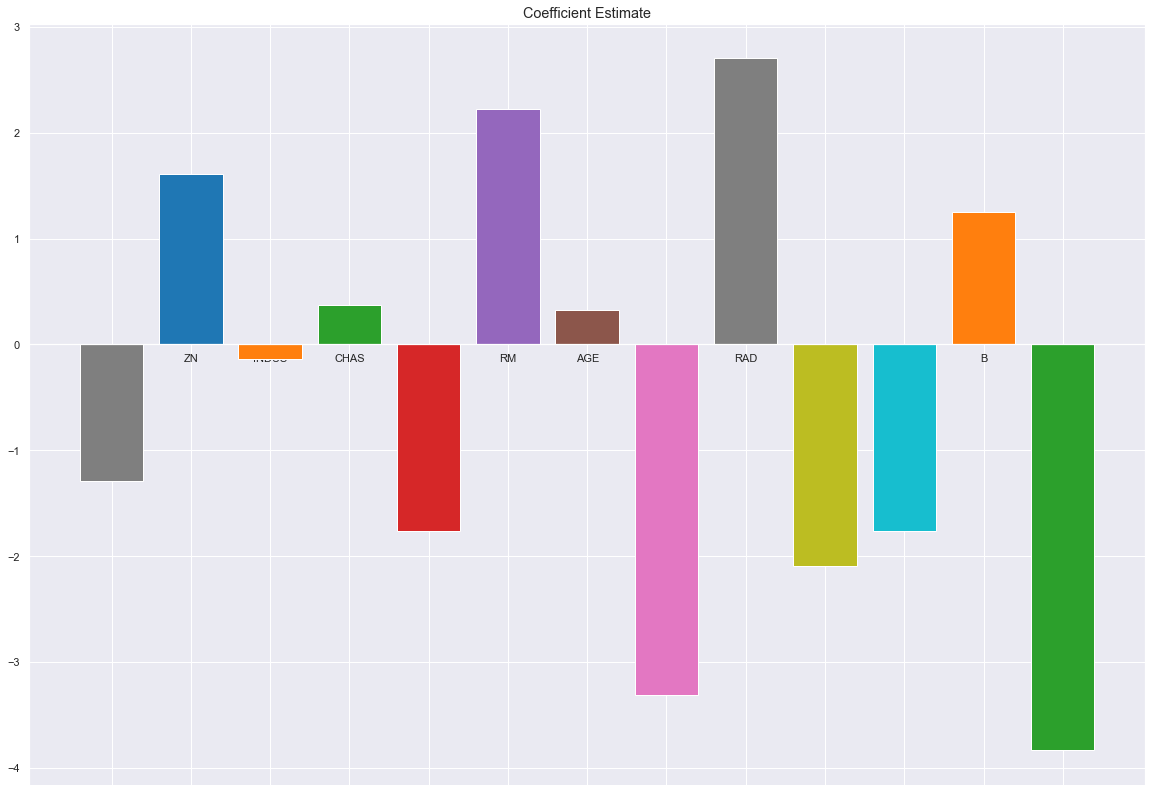

In [38]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 14))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(reg_coefficient["Columns"],
reg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.title('Coefficient Estimate')
plt.show()

In [39]:
## print the intercept

print(regression.intercept_)

22.077286135693246


## 1.1 Using model to get predictions of test data

In [40]:
## PRediction for the test data
reg_pred=regression.predict(x_test)
reg_pred

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

 ## Validating model using assumptions of Linear regression
 
### 1.2.1 Linear relationship

Test truth data and Predicted data should follow linear relationship.

This is an indication of a good model.

Text(0, 0.5, 'Test Predicted Data')

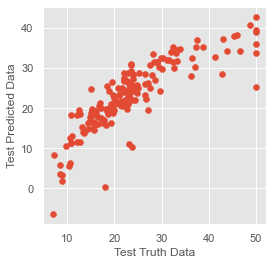

In [41]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

## 1.2.2 Residual distribution

Residuals should follow normal distribution.

If residuals follow normal distribution, it indicates we have a good model.

In [42]:
## residuals
residuals=y_test-reg_pred
residuals

305   -3.038496
193   -0.887944
65    -7.498956
349    4.286033
151    0.705072
         ...   
442   -1.004380
451   -4.387684
188   -2.638009
76    -2.661709
314   -1.885761
Name: Price, Length: 167, dtype: float64

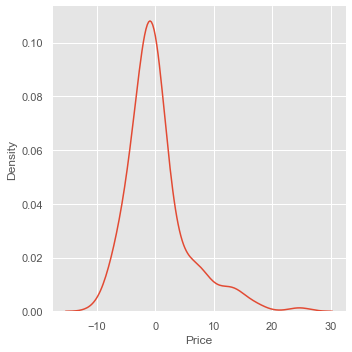

In [43]:
sns.displot(residuals,kind="kde")

## 1.2.3 Uniform distribution

Residuals vs Predictions should follow a uniform distribution.

If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

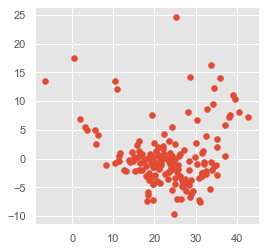

In [44]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

## 1.3 Performance Matrix

1.3.1 Cost function values


### MSE, MAE and RMSE

In [45]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## MSE, MAE and RMSE

In [46]:
print("Mean squared error is {}".format(mean_squared_error(y_test,reg_pred)))
print("Mean absolute error is {}".format(mean_absolute_error(y_test,reg_pred)))
print("Root Mean squared error is {}".format(np.sqrt(mean_squared_error(y_test,reg_pred))))

Mean squared error is 27.100991709962493
Mean absolute error is 3.5206585298797926
Root Mean squared error is 5.205861284164465


## R square and adjusted R square

In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)
print("Our Linear regression model has {} % accuracy".format(round(score*100,3)))

0.7165219393967555
Our Linear regression model has 71.652 % accuracy


In [48]:
## Adjusted R square
#display adjusted R-squared
linear_reg_adj_r2_score= 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(linear_reg_adj_r2_score)

print("Adjusted R square accuracy is {} percent".format(round(linear_reg_adj_r2_score*100,2)))

0.6924355682343882
Adjusted R square accuracy is 69.24 percent


## Model Building
### 2.0 Ridge Regression

Ridge regression allows us to analyze data even when severe multicollinearity is present and helps prevent overfitting. This type of model reduces the large, problematic variance that multicollinearity causes by introducing a slight bias in the estimates. 

In [49]:
## Ridge
from sklearn.linear_model import Ridge


## creating Ridge regression model
ridge_reg=Ridge()
ridge_reg

Ridge()

In [50]:
### Passing training data(X and y) to the model


ridge_reg.fit(x_train,y_train)

Ridge()

In [51]:
### Printing co-efficients and intercept of best fit hyperplane

print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))

print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [-1.27565151  1.5819406  -0.1614208   0.37673024 -1.72386872  2.24434183
  0.30956702 -3.26398836  2.60274628 -1.99924081 -1.75198618  1.25002916
 -3.81456087]
2. Intercept of best fit hyper plane is 22.077286135693246


## 2.1 Using model to get predictions of test data

In [52]:
# Using model to get predictions of test data
ridge_reg_pred = ridge_reg.predict(x_test)
ridge_reg_pred

array([31.32951625, 31.98180665, 30.96523995, 22.45112285, 18.93171888,
       16.21770197, 35.96932532, 14.8453389 , 25.00644473, 37.08826243,
       21.49615236, 30.86395535, 27.9880323 , 33.98239498, 33.72731108,
       40.61743429, 24.27292247, 23.33888547, 25.52862017, 21.42716828,
       32.68689234, 17.88582539, 25.50293435, 25.01797349, 32.58757636,
       20.48521647, 19.51598666, 16.94098815, 38.35803356,  0.33567931,
       32.44411299, 32.10347472, 26.13567232, 23.81384315, 20.64388179,
       19.71829821,  3.56174179, 35.17319673, 27.02020897, 27.65038259,
       34.3408154 , 29.77237182, 18.39828682, 31.55283209, 17.92580288,
       28.51408759, 19.49631857, 21.65517408, 38.03589465, 16.47721333,
       24.56300743, 19.66060562, 24.490545  , 34.33513167, 26.7462751 ,
       34.83714079, 21.08524522, 19.88396747, 18.65820105, 24.71538111,
       20.00248822, 23.58585608, 39.60689645, 42.79543819, 30.3548884 ,
       17.07425788, 23.84421168,  3.23169724, 31.42539336, 28.75

## 2.2 Validating model using assumptions of Ridge regression
### 2.2.1 Linear relationship


Test truth data and Predicted data should follow linear relationship.
This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

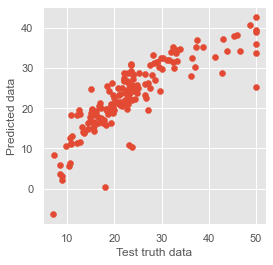

In [53]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### 2.2.2 Residual distribution
Residuals should follow normal distribution.
If residuals follow normal distribution, it indicates we have a good model.

In [54]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg.head()

305   -2.929516
193   -0.881807
65    -7.465240
349    4.148877
151    0.668281
Name: Price, dtype: float64

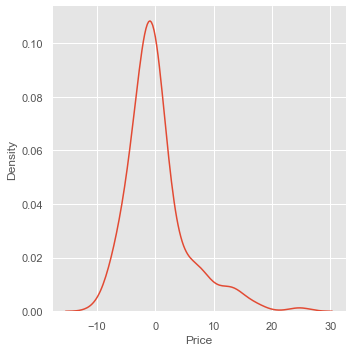

In [55]:
sns.displot(x=residual_ridge_reg, kind='kde')

### 2.2.3 Uniform distribution
Residuals vs Predictions should follow a uniform distribution.
If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

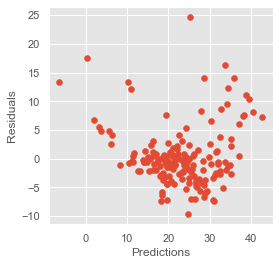

In [56]:
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### 2.3 Performance Matrix

### MSE, MAE and RMSE

2.3.1 Cost function values

In [57]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean squared error is {}".format(round(mean_squared_error(y_test, ridge_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, ridge_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)))

Mean squared error is 27.08
Mean absolute error is 3.52
Root Mean squared error is 5.2


### 2.3.2 R Square and Adjusted R Square values

In [58]:
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
print("Our Ridge regression model has {} % accuracy".format(round(ridge_reg_r2_score*100,3)))

ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(ridge_reg_adj_r2_score*100,2)))

Our Ridge regression model has 71.678 % accuracy
Adjusted R square accuracy is 69.27 percent


## Model Building

## 3.0 Lasso Regression

Lasso regression (least absolute shrinkage and selection operator) performs variable selection that aims to increase prediction accuracy by identifying a simpler model. It is similar to Ridge regression but with variable selection.

In [59]:

from sklearn.linear_model import Lasso

In [60]:
## creating Lasso regression model
lasso_reg=Lasso()
lasso_reg

Lasso()

In [61]:
### Passing training data(X and y) to the model
lasso_reg.fit(x_train, y_train)

Lasso()

In [62]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-0.05088722  0.         -0.          0.         -0.          2.33991441
 -0.         -0.         -0.         -0.         -1.21265926  0.50346933
 -3.52626441]
2. Intercept of best fit hyper plane is 22.077286135693242


### 3.1 Using model to get predictions of test data

In [63]:
lasso_reg_pred=lasso_reg.predict(x_test)
lasso_reg_pred

array([25.64194382, 29.81425297, 27.94324255, 27.55256464, 20.99640298,
       18.74520609, 34.28217994, 15.93009427, 20.70883387, 34.07542731,
       19.90502439, 26.60490365, 24.07990755, 29.92866139, 29.22037693,
       36.40160499, 26.2514407 , 19.88117334, 23.967085  , 22.50869347,
       30.87428332, 18.78300957, 23.92041383, 25.68996484, 32.43275786,
       21.59346217, 20.77097939, 19.17145706, 34.09829244,  2.83421427,
       30.5699873 , 29.29565261, 26.85558827, 25.25346658, 19.26477827,
       19.73302762,  7.84289608, 29.77239449, 25.40207471, 25.60513357,
       32.3846261 , 26.89227407, 18.03007537, 29.36340326, 18.91119501,
       27.26813644, 20.46203931, 21.03622196, 34.39115891, 18.05973586,
       23.67935365, 18.6389767 , 22.52686697, 32.78082702, 26.03741902,
       30.39354515, 20.51475327, 20.94796259, 17.76992156, 24.71515119,
       21.39562999, 22.87363803, 36.66878913, 37.88636344, 28.19838095,
       17.67593653, 24.95639783,  5.16197744, 27.44103022, 33.73

## 3.2 Validating model using assumptions of Lasso regression
### 3.2.1 Linear relationship
Test truth data and Predicted data should follow linear relationship.
This is an indication of a good model.


Text(0, 0.5, 'Predicted data')

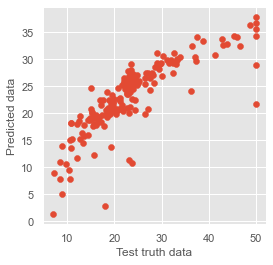

In [64]:
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### 3.2.2 Residual distribution

Residuals should follow normal distribution.
If residuals follow normal distribution, it indicates we have a good model.

In [65]:
residual_lasso_reg=y_test-lasso_reg_pred
residual_lasso_reg.head()

305    2.758056
193    1.285747
65    -4.443243
349   -0.952565
151   -1.396403
Name: Price, dtype: float64

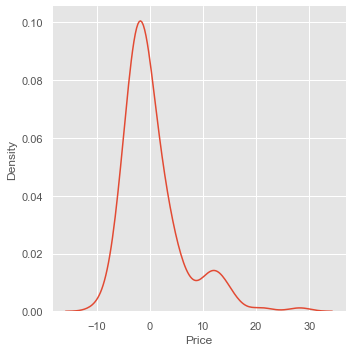

In [66]:
sns.displot(x=residual_lasso_reg, kind='kde')

### 3.2.3 Uniform distribution
Residuals vs Predictions should follow a uniform distribution.
If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

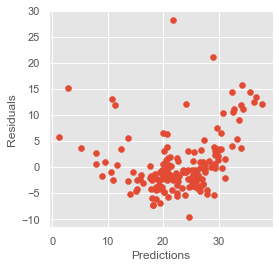

In [67]:
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## 3.3 Performance Matrix

### 3.3.1 Cost function values
## MSE, MAE and RMSE

In [68]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, lasso_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, lasso_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)))

Mean squared error is 32.17
Mean absolute error is 3.91
Root Mean squared error is 5.67


### 3.3.2 R Square and Adjusted R Square values

In [69]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
print("Our Lasso regression model has {} % accuracy".format(round(lasso_reg_r2_score*100,3)))

lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(lasso_reg_adj_r2_score*100,2)))

Our Lasso regression model has 66.352 % accuracy
Adjusted R square accuracy is 63.49 percent


## Model Building

## 4.0 Elastic-Net Regression

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.


In [70]:
from sklearn.linear_model import ElasticNet

In [71]:

## creating Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [72]:
### Passing training data(X and y) to the model
elastic_reg.fit(x_train, y_train)

ElasticNet()

In [73]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [-0.43490082  0.32641408 -0.2449198   0.19136153 -0.15045186  2.09765048
 -0.         -0.         -0.         -0.30010971 -1.13949057  0.64784661
 -2.30243571]
2. Intercept of best fit hyper plane is 22.077286135693242


### 4.1 Using model to get predictions of test data

In [74]:
elastic_reg_pred=elastic_reg.predict(x_test)
elastic_reg_pred

array([26.0417533 , 29.72847396, 28.13249256, 27.33126697, 20.42880538,
       17.74088482, 31.34694254, 16.67485774, 22.66361605, 32.11606238,
       20.44062928, 27.05265082, 24.30388496, 29.10453835, 29.42032134,
       34.87404662, 25.31690008, 21.08018038, 24.04009667, 22.78241695,
       28.62957505, 18.35172223, 23.50225053, 24.94025282, 31.31440303,
       21.87551246, 22.30554751, 18.38033279, 33.5961939 ,  5.07350586,
       31.03524275, 28.19235387, 27.2862085 , 24.92462838, 19.28719449,
       20.2043877 ,  9.65913955, 29.64752478, 24.48773946, 25.34376165,
       30.68019641, 26.22751049, 18.01125345, 29.21052894, 20.61959202,
       27.27830384, 19.56149084, 19.72195809, 33.16071763, 19.16416141,
       23.05862027, 18.66118548, 22.77766754, 31.26962741, 25.0249516 ,
       29.94893114, 20.8407824 , 19.87498778, 18.27542547, 22.76517295,
       20.81723461, 22.76805785, 34.51940602, 36.11020157, 27.24493161,
       18.27047552, 24.17101249,  7.04406772, 26.85508847, 32.20

### 4.2 Validating model using assumptions of Elastic-Net regression

#### 4.2.1 Linear relationship
Test truth data and Predicted data should follow linear relationship.
This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

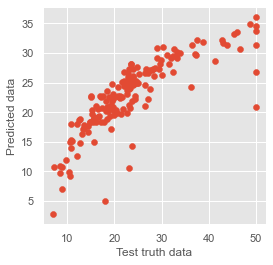

In [75]:
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### 4.2.2 Residual distribution
Residuals should follow normal distribution.
If residuals follow normal distribution, it indicates we have a good model.

In [76]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg.head()

305    2.358247
193    1.371526
65    -4.632493
349   -0.731267
151   -0.828805
Name: Price, dtype: float64

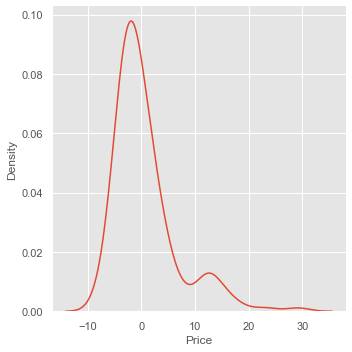

In [77]:
sns.displot(x=residual_elastic_reg, kind='kde')

### 4.2.3 Uniform distribution
Residuals vs Predictions should follow a uniform distribution.
If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

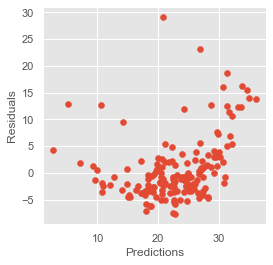

In [78]:
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### 4.3 Performance Matrix
### 4.3.1 Cost function values
### MSE, MAE and RMSE

In [79]:
print("Mean squared error is '{}'".format(round(mean_squared_error(y_test, elastic_reg_pred),2)))
print("Mean absolute error is '{}'".format(round(mean_absolute_error(y_test, elastic_reg_pred),2)))
print("Root Mean squared error is '{}'".format(round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)))

Mean squared error is '35.34'
Mean absolute error is '4.04'
Root Mean squared error is '5.94'


### 4.3.2 R Square and Adjusted R Square values

In [80]:
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
print("Our Elastic-Net regression model has {} % accuracy".format(round(elastic_reg_r2_score*100,3)))

elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(elastic_reg_adj_r2_score*100,2)))

Our Elastic-Net regression model has 63.033 % accuracy
Adjusted R square accuracy is 59.89 percent


### 5.0 Comparisions of all Models
### 5.1 MSE

In [81]:
print("MSE for Linear Regression Model is '{}'\nMSE for Ridge Regression Model is '{}'\nMSE for Lasso Regression Model is '{}'\nMSE for Elastic-Net Regression Model is '{}'\n"
      .format(round(mean_squared_error(y_test, reg_pred),2), round(mean_squared_error(y_test, ridge_reg_pred),2),
             round(mean_squared_error(y_test, lasso_reg_pred),2), round(mean_squared_error(y_test, elastic_reg_pred),2)))

MSE for Linear Regression Model is '27.1'
MSE for Ridge Regression Model is '27.08'
MSE for Lasso Regression Model is '32.17'
MSE for Elastic-Net Regression Model is '35.34'



### 5.2 MAE

In [82]:
print("MAE for Linear Regression Model is '{}'\nMAE for Ridge Regression Model is '{}'\nMAE for Lasso Regression Model is '{}'\nMAE for Elastic-Net Regression Model is '{}'\n"
      .format(round(mean_absolute_error(y_test, reg_pred),2), round(mean_absolute_error(y_test, ridge_reg_pred),2),
             round(mean_absolute_error(y_test, lasso_reg_pred),2), round(mean_absolute_error(y_test, elastic_reg_pred),2)))

MAE for Linear Regression Model is '3.52'
MAE for Ridge Regression Model is '3.52'
MAE for Lasso Regression Model is '3.91'
MAE for Elastic-Net Regression Model is '4.04'



### 5.3 RMSE

In [83]:
print("RMSE for Linear Regression Model is '{}'\nRMSE for Ridge Regression Model is '{}'\nRMSE for Lasso Regression Model is '{}'\nRMSE for Elastic-Net Regression Model is '{}'\n"
      .format(round(np.sqrt(mean_squared_error(y_test, reg_pred)),2), round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2),
             round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2), round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)))

RMSE for Linear Regression Model is '5.21'
RMSE for Ridge Regression Model is '5.2'
RMSE for Lasso Regression Model is '5.67'
RMSE for Elastic-Net Regression Model is '5.94'



### 5.4 R Square values

In [84]:
print("Accuracy of Linear Regression Model is '{}'\nAccuracy of Ridge Regression Model is '{}'\nAccuracy of Lasso Regression Model is '{}'\nAccuracy of Elastic-Net Regression Model is '{}'\n".format(
round(score*100,3), round(ridge_reg_r2_score*100,3), round(lasso_reg_r2_score*100,3), round(elastic_reg_r2_score*100,3)))

Accuracy of Linear Regression Model is '71.652'
Accuracy of Ridge Regression Model is '71.678'
Accuracy of Lasso Regression Model is '66.352'
Accuracy of Elastic-Net Regression Model is '63.033'



### 5.5 Adjusted R Square values

In [85]:
print("Adjusted R Square accuracy for Linear Regression Model is '{}'\nAdjusted R Square accuracy for Ridge Regression Model is '{}'\nAdjusted R Square accuracy for Lasso Regression Model is '{}'\nAdjusted R Square accuracy for Elastic-Net Regression Model is '{}'\n".format(
round(linear_reg_adj_r2_score*100,3), round(ridge_reg_adj_r2_score*100,3), round(ridge_reg_adj_r2_score*100,3), round(elastic_reg_adj_r2_score*100,3)))

Adjusted R Square accuracy for Linear Regression Model is '69.244'
Adjusted R Square accuracy for Ridge Regression Model is '69.271'
Adjusted R Square accuracy for Lasso Regression Model is '69.271'
Adjusted R Square accuracy for Elastic-Net Regression Model is '59.891'

